# CSM148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-4) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn import model_selection

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [4]:
def print_metrics(y_test, preds):
    print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(y_test, preds)))
    print("%-12s %f" % ("Precision:", metrics.precision_score(y_test, preds)))
    print("%-12s %f" % ("Recall:", metrics.recall_score(y_test, preds)))
    print("%-12s %f" % ("F1 score:", metrics.f1_score(y_test, preds)))

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [5]:
data = pd.read_csv("heartdisease.csv")

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [6]:
print(data.head())
print()
print(data.describe())
print()
print(data.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal   sick  
0   0     1  False  
1   0     2  False  
2   0     2  False  
3   0     2  False  
4   0     2  False  

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000

### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

Only sick may be problemmatic since it is the only non-numeric variable, but it can easily be converted to 1/0 for True/False.

### Determine if we're dealing with any null values. If so, report on which columns? 

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

There are no null values.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [8]:
data["sick_num"] = data["sick"].astype("int64",copy=False)
data.drop("sick", axis=1, inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick_num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

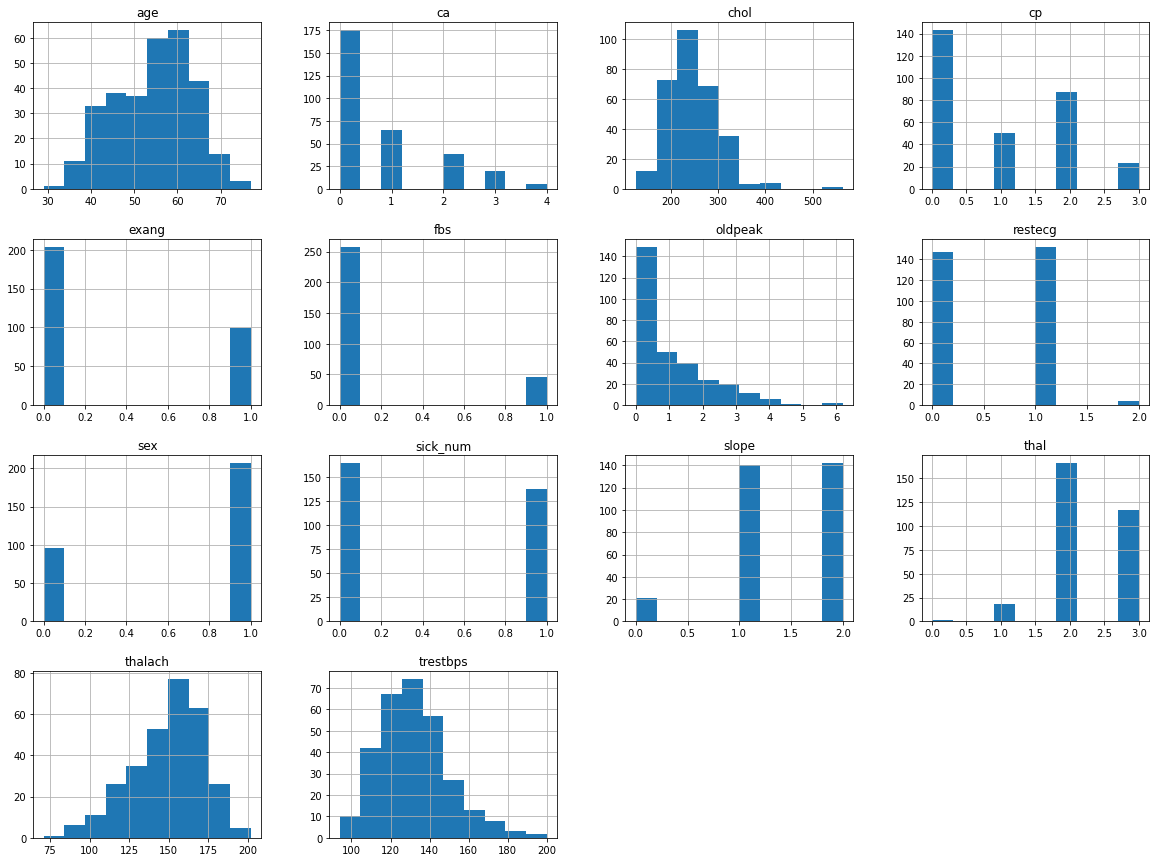

In [9]:
data.hist(figsize=(20,15))
plt.show()

Sex, fbs, exang, and sick_num are binary variables. Cp, restecg, slope, ca, and thal have a limited number of values, and the remaining variables appear to take on continuous values.

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

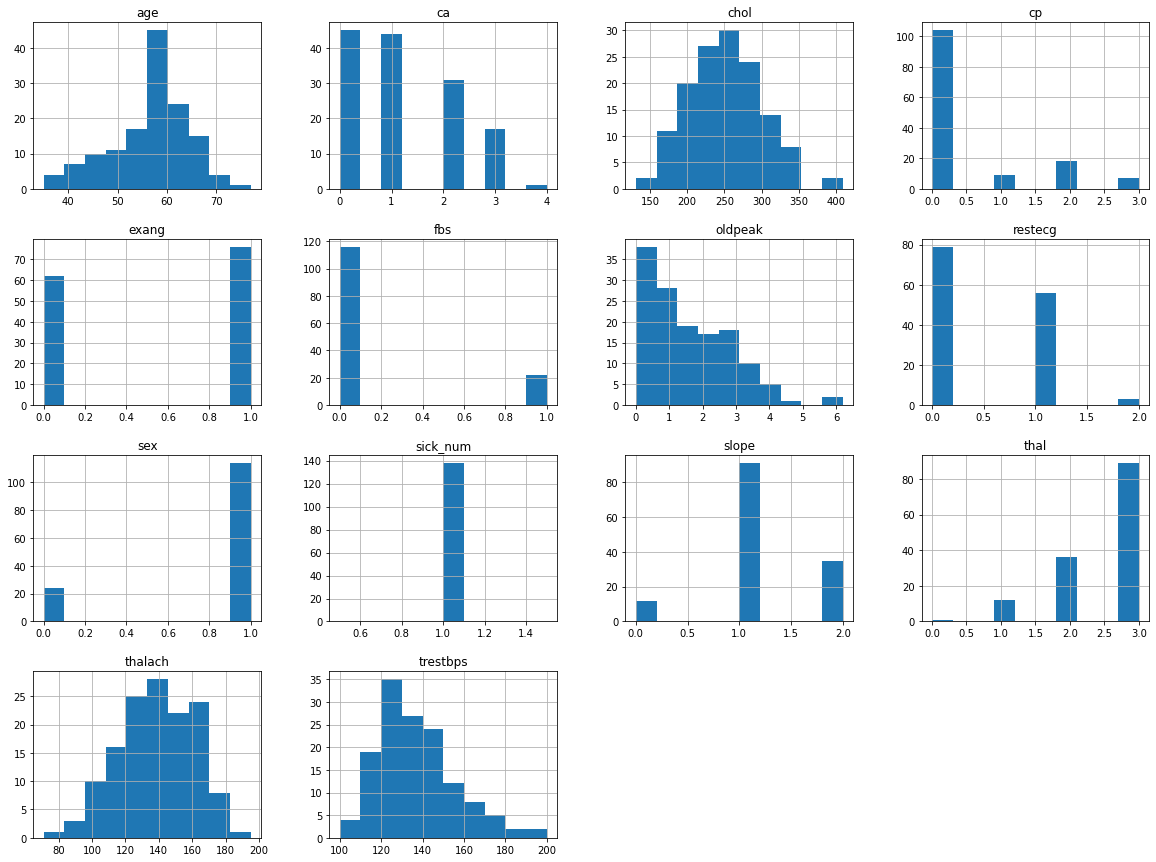

Number of sick individuals:  138
Number of healthy individuals:  165


In [10]:
sick_target = data[data.sick_num == 1]
sick_target.hist(figsize=(20,15))
plt.show()
print("Number of sick individuals: ", len(sick_target))
print("Number of healthy individuals: ", len(data[data.sick_num == 0]))

The dataset appears to be balanced between sick and healthy individuals. The histograms of the sick target resemble those of the full dataset. None of the discrete variables (binary or limited selection) have counts of zero in any place where the full dataset had a nonzero count, aside from sick_num, and the histograms of the continuously valued variables display a similar shape as for the full dataset.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Artificially balancing a dataset can make the dataset unrepresentative of the real world and potentially introduce relationships that do not actually exist. You may lose information about the true frequency of values ocurring, and the model can incorrectly learn to classify objects of different classes with the same probability.

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed correlations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

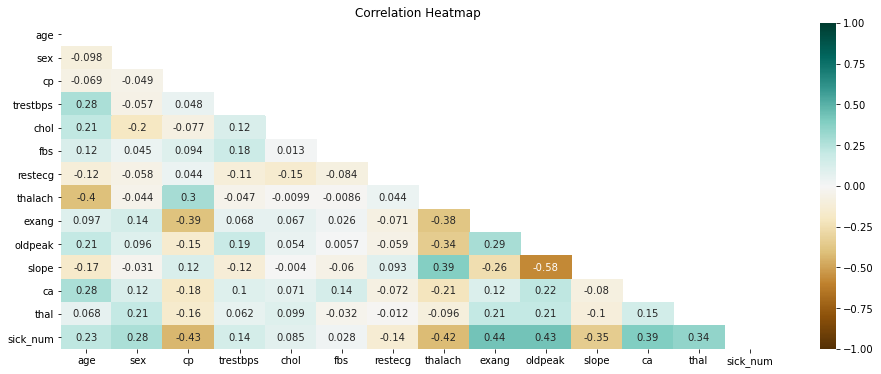

In [11]:
corr = data.corr()
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation Heatmap")
plt.show()

The features with the weakest correlation with sick_num are chol and fbs. The variables with the strongest positive correlations with sick_num are exang (0.44) and oldpeak (0.43), and the strongest negative correlations are with cp (-0.43) and thalach (-0.42). It makes sense that exercise induced angina and depression are more frequent in patients with heart disease, whereas maximum heart rate would be lower in those who are sick. While it is surprising that chest pain is negatively correlated with heart disease, a reasonably explanation for this could be that patients with heart disease may already be taking medication or other treatment for chest pain.

## Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [12]:
y = data["sick_num"]
x = data.drop("sick_num", axis=1)

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method). Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [14]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [15]:
# Report on model Accuracy
print_metrics(y_test, preds)

Accuracy:    0.688525
Precision:   0.692308
Recall:      0.620690
F1 score:    0.654545


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler

### Pipeline:

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

x_prepared = num_pipeline.fit_transform(x)
x_prepared

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

In [17]:
X_train_prepared, X_test_prepared, y_train, y_test = train_test_split(x_prepared, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [18]:
# k-Nearest Neighbors algorithm
knn_prepared = KNeighborsClassifier()
knn_prepared.fit(X_train_prepared, y_train)
preds_prepared = knn_prepared.predict(X_test_prepared)

In [19]:
# Accuracy
print_metrics(y_test, preds_prepared)

Accuracy:    0.918033
Precision:   0.900000
Recall:      0.931034
F1 score:    0.915254


The KNN model performs much better on the piplined data, with an accuracy of 0.786885 compared to 0.573770 without pipeilining. These results show the improved effect of scaling the data before running a KNN.

### Parameter Optimization.  As we saw in lecture, the KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [20]:
n_arr = [1, 2, 3, 5, 7, 9, 10, 20, 50]
accuracies = {}

for n in n_arr:
    knn_n = KNeighborsClassifier(n_neighbors=n)
    knn_n.fit(X_train_prepared, y_train)
    preds_n = knn_n.predict(X_test_prepared)
    
    accuracies[n] = metrics.accuracy_score(y_test, preds_n)

accuracies

{1: 0.8524590163934426,
 2: 0.8524590163934426,
 3: 0.8688524590163934,
 5: 0.9180327868852459,
 7: 0.9180327868852459,
 9: 0.8852459016393442,
 10: 0.9016393442622951,
 20: 0.8852459016393442,
 50: 0.8852459016393442}

## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

In [21]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, y_train)
preds_lr = log_reg.predict(X_test_prepared)
# score = log_reg.predict_proba(X_test_prepared)[:,1]

### This time report four metrics: Accuracy, Precision, Recall, and F1 Score, and plot a Confusion Matrix. 

Accuracy:    0.852459
Precision:   0.833333
Recall:      0.862069
F1 score:    0.847458


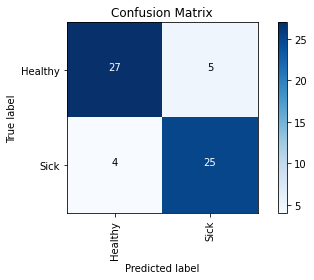

In [22]:
print_metrics(y_test, preds_lr)

draw_confusion_matrix(y_test, preds_lr, ["Healthy", "Sick"])

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy is computed as (TP+TN)/(TP+FP+FN+TN). It reports the number of correct predictions out of all total predictions. It is the most basic metric that does not distinguish between the two types of errors, and it is used when true positives and true negatives are important. Accuracy can be valuable for symmetric datasets.

Precision is computed as (TP)/(TP+FP). It measures how many positive identifications are actually correct, so a high accuracy is important when we are concerned with ensuring a low false positive rate. Precision might be important for pregnancy tests, when false positives should be minimized to avoid unnecessary distress or false hope for the person taking the test.

Recall is computed as (TP)/(TP+FN). It is the number of correct positive predictions out of all observations in the actual class, so it is concerned with false negatives. Recall may be a valuable measure in medical diagnostic tests, because it is crucial to detect when a medical condition actually exists.

F1 is 2\*Recall\*Precision/(Recall+Precision). It calculates a weighted average of Precision and Recall, so it takes both false positives and false negatives into account. It is good for minimizing both types of errors. F1 is good to use when classes are imbalanced, for instance in detecting spam emails, in which case the data is very imbalanced with few observations of spam emails compared to not spam emails.

### Graph the resulting ROC curve of the model

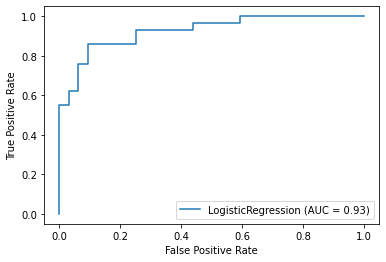

In [23]:
metrics.plot_roc_curve(log_reg, X_test_prepared, y_test)
plt.show()

### Describe what an ROC curve is and what the results of this graph seem to be indicating

An ROC curve plots the TP rate against the FP rate at varying classification thresholds. At lower thresholds, we expect more observations to be classified as positive, which increases both the FP and the TP rates. The area under an ROC curve (AUC) measures how useful a test it. A good model has AUC close to 1, as it can separate classes well. At AUC = 0.5, the model has no class separation capacity and it performs as well as randomly selecting the class. AUC = 0 means the model is predicting the opposite class of the true label.

In the above plot, the AUC = 0.93, so the model has good separability between sick and healthy classes.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Report out the same metrics. Let's see how your results change!

C:\Users\gtang\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy:    0.836066
Precision:   0.806452
Recall:      0.862069
F1 score:    0.833333


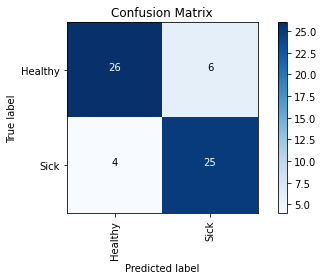

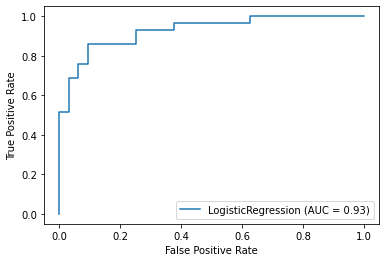

In [24]:
# Logistic Regression
log_reg2 = LogisticRegression(solver='sag', max_iter=10, penalty='none')
log_reg2.fit(X_train_prepared, y_train)
preds_lr2 = log_reg2.predict(X_test_prepared)
# score = log_reg2.predict_proba(X_test_prepared)[:,1]

print_metrics(y_test, preds_lr2)

draw_confusion_matrix(y_test, preds_lr2, ["Healthy", "Sick"])

metrics.plot_roc_curve(log_reg2, X_test_prepared, y_test)
plt.show()

### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

Accuracy:    0.852459
Precision:   0.833333
Recall:      0.862069
F1 score:    0.847458


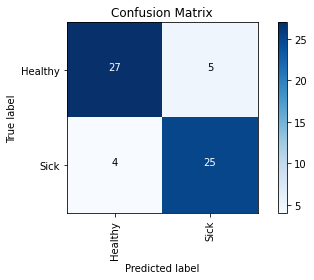

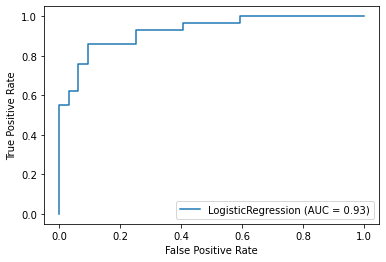

In [25]:
# Logistic Regression
log_reg2 = LogisticRegression(solver='sag', max_iter=100, penalty='none')
log_reg2.fit(X_train_prepared, y_train)
preds_lr2 = log_reg2.predict(X_test_prepared)
# score = log_reg2.predict_proba(X_test_prepared)[:,1]

print_metrics(y_test, preds_lr2)

draw_confusion_matrix(y_test, preds_lr2, ["Healthy", "Sick"])

metrics.plot_roc_curve(log_reg2, X_test_prepared, y_test)
plt.show()

### Explain what you changed, and why do you think, even though you 'fixed' the problem, that you may have harmed the outcome. What other Parameters you set may have impacted this result?

Max_iter was increased from 10 to 100. This may have harmed the outcome because increasing the number of iterations has increased the computation time. While the convergence warning is resolved, Setting the penalty to none may have also affected the result, because having no penalty can lead to overfitting of the model, which reduces the performance.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

Accuracy:    0.868852
Precision:   0.862069
Recall:      0.862069
F1 score:    0.862069


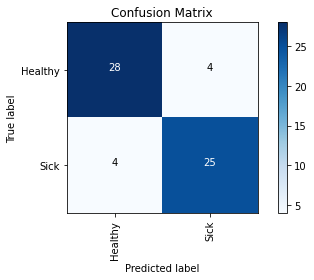

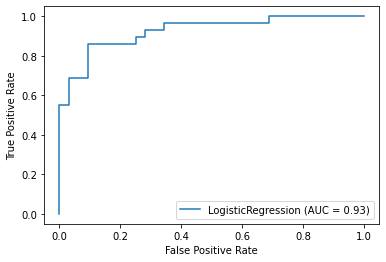

In [26]:
# Logistic Regression
log_reg3 = LogisticRegression(solver='liblinear', penalty='l1')
log_reg3.fit(X_train_prepared, y_train)
preds_lr3 = log_reg3.predict(X_test_prepared)
# score = log_reg3.predict_proba(X_test_prepared)[:,1]

print_metrics(y_test, preds_lr3)

draw_confusion_matrix(y_test, preds_lr3, ["Healthy", "Sick"])

metrics.plot_roc_curve(log_reg3, X_test_prepared, y_test)
plt.show()

### Explain what what the two solver approaches are, and why the liblinear likely produced the optimal outcome. 

Liblinear uses a coordinate descent algorithm to minimize the loss function, which moves toward the minimum in one direction at a time. SAG is a variation of gradient descent that incorporates a random sample of previous gradient values. It is fast for large datasets. Liblinear also handles L1 penalty, whereas SAG handles L2 or no penalty.

Liblinear likely produced the better outcome because our data has 12 features, and liblinear performs well on data with high dimensionality. Using liblinear with L1 penalty compared to no penatly with SAG may have also contributed to this by reducing the complexity of the model to avoid overfitting to the training data.

### We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and how an L1 penalty works.

A penalty term is a regularization term that is added to the loss function that gives some weight to minimizing parameter estimates. The regularization term can be expressed as a penalty factor ($\lambda$) multiplied by the sum of the magnitude of parameter estimates to the nth power. In L1 regularization, n = 1 and the penalty term is simply lambda times the sum of parameter magnitudes. L1 regularization can be used when there may be strong correlation between features and not all features might be needed, as L1 allows some parameters to go to zero.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [27]:
# SVM
svm = SVC(probability = True) # need probability to generate ROC curves
svm.fit(X_train_prepared, y_train)
preds_svm = svm.predict(X_test_prepared)
# score = svm.predict_proba(X_test_prepared)

### Report the accuracy, precision, recall, F1 Score, and confusion matrix and ROC Curve of the resulting model.

Accuracy:    0.868852
Precision:   0.838710
Recall:      0.896552
F1 score:    0.866667


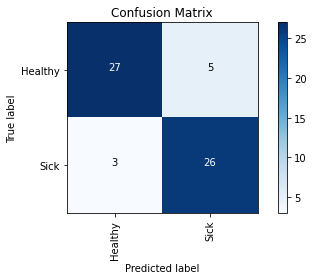

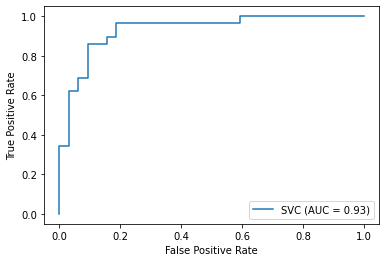

In [28]:
print_metrics(y_test, preds_svm)

draw_confusion_matrix(y_test, preds_svm, ["Healthy", "Sick"])

metrics.plot_roc_curve(svm, X_test_prepared, y_test)
plt.show()

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

Accuracy:    0.868852
Precision:   0.862069
Recall:      0.862069
F1 score:    0.862069


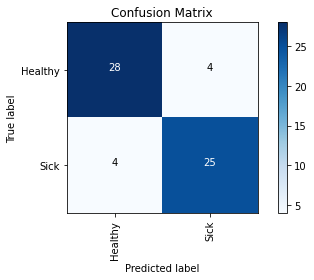

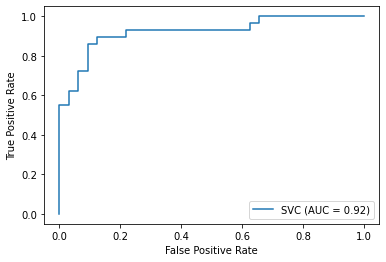

In [29]:
# SVM
svm2 = SVC(kernel='linear', probability = True)
svm2.fit(X_train_prepared, y_train)
preds_svm2 = svm2.predict(X_test_prepared)
score = svm2.predict_proba(X_test_prepared)

print_metrics(y_test, preds_svm2)

draw_confusion_matrix(y_test, preds_svm2, ["Healthy", "Sick"])

metrics.plot_roc_curve(svm2, X_test_prepared, y_test)
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The default kernel type is RBF. RBF is a nonlinear kernel which is better for nonlinear problems, whereas a linear kernel is better for linear problems. The default SVM classifier has performed better, with an F1 score of 0.866667 compared to 0.862069 for the linear kernel, potentially because the data is not linearly separable.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic regression models the probability of a label as a sigmoidal function, then applies an activation function that compares the probability to a threshold to determine the label. Logistic regression produces a linear decision boundary, but the logistic function is not a linear function.

SVM produces a classification by defining a separating hyperplane and optimizing based on support vectors, so the function itself is already linear.

## Baysian (Statistical) Classification

In class we will be learning about Naive Bayes, and statistical classification.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable Y  and dependent feature vector X1 through Xn. 

### Please implement a Naive Bayes Classifier on the pipelined data. For this model simply use the default parameters. Report out the number of mislabeled points that result (i.e., both the false positives and false negatives), along with the accuracy, precision, recall, F1 Score and Confusion Matrix. Refer to documentation on implementing a NB Classifier [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_prepared, y_train)
preds_gnb = gnb.predict(X_test_prepared)

print("Number of mislabeled points out of a total %d points : %d" % (X_test_prepared.shape[0], (y_test != preds_gnb).sum()))

Number of mislabeled points out of a total 61 points : 8


Accuracy:    0.868852
Precision:   0.838710
Recall:      0.896552
F1 score:    0.866667


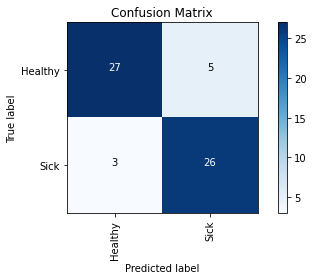

In [31]:
print_metrics(y_test, preds_gnb)

draw_confusion_matrix(y_test, preds_gnb, ["Healthy", "Sick"])

### Discuss the observed results. What assumptions about our data are we making here and why might those be inacurate?

When using a Gaussian naive Bayes classifier, we assume that the likelihood of each feature $P(x_i|y)$ follows a Gaussian distribution. This might be inaccurate because not all likelihoods may be Gaussian. Based on the histograms of features for the sick target, it appears that features such as chol and thalach may be modelled by a Gaussian distribution, but features such as oldpeak and thal are clearly asymmetrical.

## Cross Validation and Model Selection

You've sampled a number of different classification techniques, leveraging clusters, linear classifiers, and Statistical Classifiers, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Report your best performing model.

In [32]:
# based on F1 scores, KNN with k=5 (F1 = 0.915254) and SVM wth the default kernel (F1 = 0.866667) were two top performing models

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

knn_kfold = KNeighborsClassifier(n_neighbors=5)
svm_kfold = SVC()

knn_kfold_results = model_selection.cross_val_score(knn_kfold, x_prepared, y, cv=kfold)
svm_kfold_results = model_selection.cross_val_score(svm_kfold, x_prepared, y, cv=kfold)

print("KNN Accuracy: %.2f%%" % (knn_kfold_results.mean()*100.0)) 
print("SVM Accuracy: %.2f%%" % (svm_kfold_results.mean()*100.0)) 

KNN Accuracy: 82.46%
SVM Accuracy: 84.14%


According to k-fold cross validation, SVM is the best performing model, with an accuracy of 84.14.%.